In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

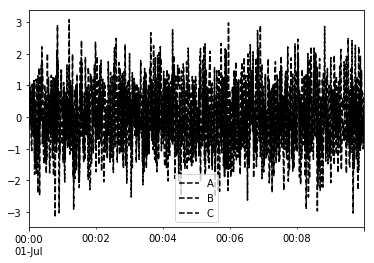

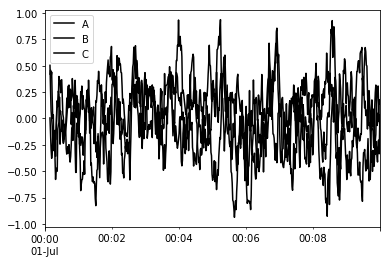

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

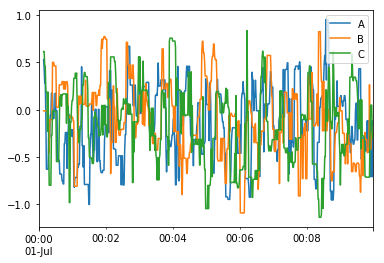

In [15]:
r.quantile(.5).plot()

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\niharika\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,0.771573,-0.187839,0.488845
2016-07-01 00:00:02,0.485966,0.240185,0.214309
2016-07-01 00:00:03,0.530078,0.359757,0.389549
2016-07-01 00:00:04,0.529997,0.075349,0.447533
2016-07-01 00:00:05,0.508930,-0.183432,0.210003
2016-07-01 00:00:06,0.617571,-0.146762,0.370062
2016-07-01 00:00:07,0.553747,0.016289,0.256455
2016-07-01 00:00:08,0.342488,0.011257,0.373817
2016-07-01 00:00:09,0.479673,0.007566,0.490401


In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

,A,B,C,D
2016-06-06,0.203455,-0.720657,-0.611659,-0.138064
2016-06-07,-0.024135,-1.153106,0.124511,0.058170
2016-06-08,0.470308,-1.174299,0.558253,-1.663692
2016-06-09,0.599957,0.289117,-0.452876,-0.052706
2016-06-10,-1.392465,-0.814651,-1.889683,-2.022989


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0AFE394A8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001E0AFFFCA58>], dtype=object)

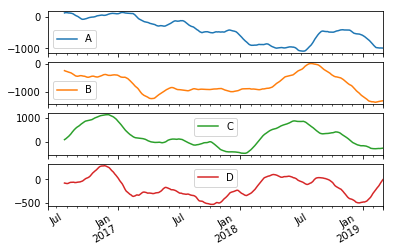

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,1.182990,0.948289,0.608602,1.138205


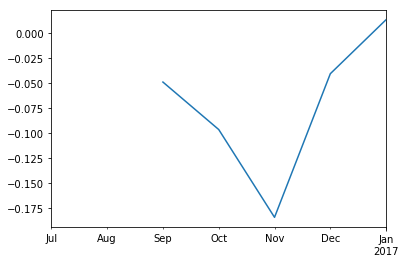

In [24]:
ts_long= pd.Series(np.random.randn(214), pd.date_range('7/1/16','1/30/17', freq='D'))
ts_long.resample('M').mean().rolling(window=3).mean().plot()

In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,0.191387,-1.297210,-0.549403,-0.108979
2016-06-08,0.344134,-1.880828,-0.342567,-0.653848
2016-06-09,0.570497,-2.100357,-0.352368,-0.939459
2016-06-10,0.427821,-2.395005,-0.736185,-1.515423


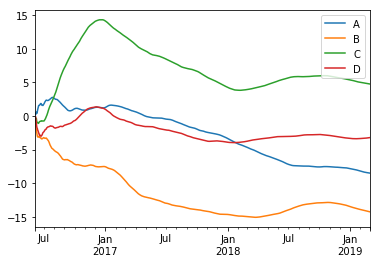

In [25]:
df.expanding(min_periods = 1).mean().plot()

In [11]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

In [12]:
# EWMA
# Why use EWMA?

In [13]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [14]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting